In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_excel("./buffer/1-data.xlsx")
main_dataset = pd.read_excel("./buffer/1-main_dataset.xlsx")
data_prepared = pd.read_excel("./buffer/2-data_prepared.xlsx")

numeric_features = data.select_dtypes(include=['int64', 'float64']).columns
categorical_features = data.select_dtypes(include=['object']).columns

In [2]:
data2 = data.loc[:, categorical_features]
data3 = data.loc[:, numeric_features]
data2_prepared = pd.get_dummies(data2)

data4 = data2_prepared.join(data3)
cor_att = data4.corr()[:1]

cor_att.where(abs(cor_att) > 0.05, inplace=True)
cor_att.dropna(inplace=True, axis=1)
cor_att.head()

,Attrition_No,Attrition_Yes,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,Department_Human Resources,EducationField_Human Resources,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Age,TotalWorkingYears,YearsAtCompany,YearsWithCurrManager
Attrition_No,1.0,-1.0,0.074457,-0.115143,-0.080768,-0.091573,0.087716,0.090984,-0.175419,0.159205,0.170338,0.134392,0.156199


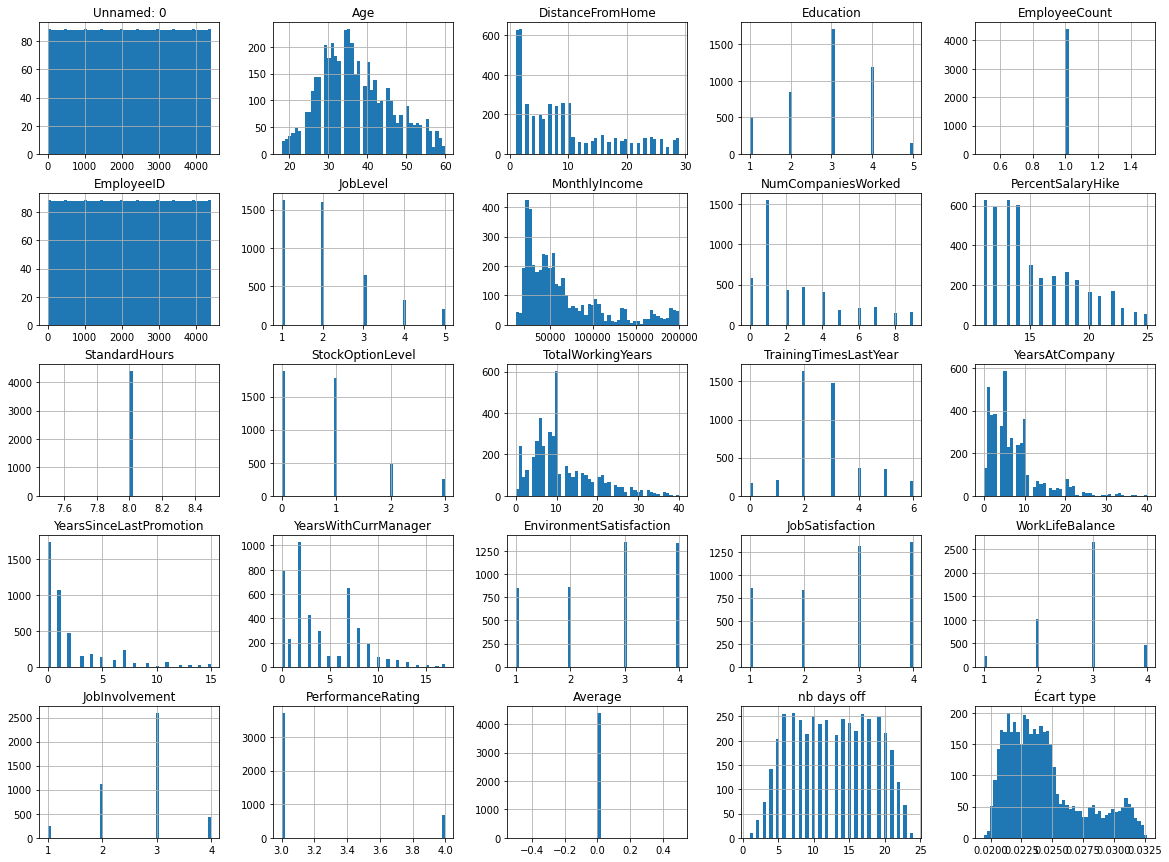

In [3]:
main_dataset["Average"] = main_dataset["Average"].values.astype(np.int64)/1e9/60/60
main_dataset.hist(bins=50, figsize=(20,15))
plt.show()

In [4]:
main_dataset.head()

,Unnamed: 0,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,...,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,Average,nb days off,Écart type
0,0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,...,0,0,3.0,4.0,2.0,3,3,0.0,17,0.023319
1,1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,...,1,4,3.0,2.0,4.0,2,4,0.0,13,0.024621
2,2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,...,0,3,2.0,2.0,1.0,3,3,0.0,7,0.022786
3,3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,...,7,5,4.0,4.0,3.0,2,3,0.0,14,0.022809
4,4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,...,0,4,4.0,1.0,3.0,3,3,0.0,4,0.024671


#### Etude du champ "Age"

- Nous constatons que l'age moyen est de 36 ans (assez jeune).
- L'age minimal est de 18 ans et le max de 60 ans.
- Avec un écart type de 9, l'écart des ages est bon (mélange d'age).
- En examinant les quartile nous voyons que le panel d'age est compris entre 30 et 43 ans

In [5]:
main_dataset["Age"].describe()

count    4410.000000
mean       36.923810
std         9.133301
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64

#### Etude du champ "MonthlyIncome"
- La moyenne des salaire est de  65059.844186/an.
- L'écart type nous montre qu'il y a un grand écart entre les petits et grands salaires.
- Nous constatons des extremes importants.

In [6]:
main_dataset["MonthlyIncome"].describe()

count      4410.000000
mean      65029.312925
std       47068.888559
min       10090.000000
25%       29110.000000
50%       49190.000000
75%       83800.000000
max      199990.000000
Name: MonthlyIncome, dtype: float64

#### Etude du champ "WorkLifeBalance"
- Dans l'ensemble les employées ont un bon équilibre entre leurs vie/travail.

In [7]:
main_dataset["WorkLifeBalance"].describe()

count    4372.000000
mean        2.761436
std         0.706245
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         4.000000
Name: WorkLifeBalance, dtype: float64

#### Etude du champ "JobSatisfaction"
- Les employées sont majoritairement satisfait de leurs emplois.

In [8]:
main_dataset["JobSatisfaction"].describe()


count    4390.000000
mean        2.728246
std         1.101253
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: JobSatisfaction, dtype: float64

#### Etude du champ "EnvironmentSatisfaction"
- Leurs environnement de travail est egalement majortairement satisfaisant pour les salariés.

In [9]:
main_dataset["EnvironmentSatisfaction"].describe()

count    4385.000000
mean        2.723603
std         1.092756
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: EnvironmentSatisfaction, dtype: float64

#### Etude du champ "YearsAtCompany"

- Le nombre d'années passé dans l'entreprise reste faible (7 ans en moyenne).
- l'étendu des valeurs est très grande (de 0 à 40ans).
- Cette variable semble interessante.

In [10]:
main_dataset["YearsAtCompany"].describe()

count    4410.000000
mean        7.008163
std         6.125135
min         0.000000
25%         3.000000
50%         5.000000
75%         9.000000
max        40.000000
Name: YearsAtCompany, dtype: float64

## Dendogramme

Le dendogramme nous permet la visualisation des regroupements hierarchique dans notre jeu de données.
Nous pouvons constater la présence de deux classes majoritaires.

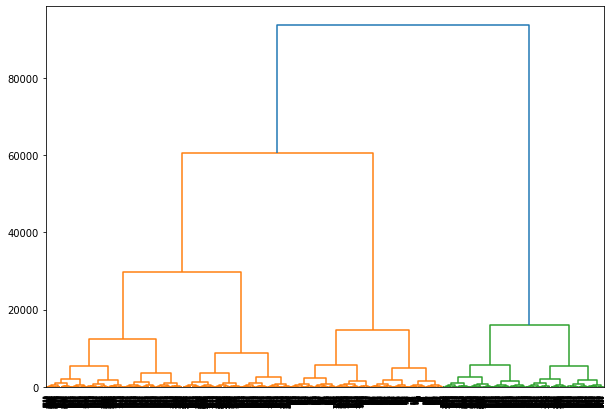

In [17]:
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure( figsize=(10, 7))

dendrogram(linkage(data_prepared, method='ward'), orientation='top', distance_sort='descending', leaf_rotation=90., leaf_font_size=5.)
plt.show()

## Hypothèse sur le jeu de données

A la suite de cette petite étude sur nos jeux de données, plusieurs hypothèse en ressorte :

- Les facteurs que nous supposons pouvant influer sur le modèle sont :
    - "JobSatisfaction"
    - "JobEnvironnement"
    - "WorklifeBalance"
    - Dans l'ensemble des paramètre qui joue sur le bien être des employés.

- Les données des enquêtes de satisfaction ne sont pas pertinentes (Un ensemble de bonne note en moyenne).

- Les 2 paramètres ayant le plus d'influence sont l'age et "MonthlyIncome" (Avis non objectif).